# Unit-1

### Qn 1

In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('heart_disease.csv')
# printing columns
print(df.axes[1])


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [21]:
col_types = {
    # as the id of the person is used to categorise
    'id':'nominal',

    # as age can be continuous; has a true zero
    'age':'ratio',

    # as sex is a category
    'sex':'nominal',

    # as the location is a category
    'dataset':'nominal',

    # as chest pain types can be categorically split
    'cp':'nominal',

    # as resting bp is continuous with true zero
    'trestbps':'ratio',

    # as cholesterol is continuous with true zero
    'chol':'ratio',

    # as fasting blood sugar can be categorised
    'fbs':'nominal',

    # as resting ecg is can be categorised
    'restecg':'nominal',

    # as max heart rate is continuous with true zero
    'thalch':'ratio' ,

    # as exercise induced angina can be categorised
    'exang':'nominal',

    # as st depression induced by exercise relative
    # to rest is continuous with no true zero
    'oldpeak':'interval',

    # as slope of the peak exercise st segment 
    # can be categorised
    'slope':'nominal', 

    # as number of major vessels colored by fluoroscopy
    # is continuous with a true zero
    'ca':'ratio',

    # as thalassemia can be categorised
    'thal':'nominal',

    # as num can be ordered categorically
    'num':'ordinal'
}

df.attrs['datatypes']=col_types

### Qn 2

In [22]:
# measure of central tendency for each attribute
# in the dataset

# using mean for numerical data
# median for ordinal data
# mode for categorical data

for col in df.columns:
    # print(col, df.attrs['datatypes'][col])
    col_type = df.attrs['datatypes'][col]
    if col_type == 'ratio' or col_type == 'interval':
        print(col,' - ', df[col].mean())
    elif col_type == 'ordinal':
        print(col,' - ', df[col].median())
    elif col_type == 'nominal':
        # printing only first mode
        print(col,' - ', df[col].mode()[0])


# standard deviation and range of values for each column
print('\nStandard deviation and range of values for each column:')
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        print('Column: ',col)
        print('Standard deviation -', df[col].std())
        print('Max - ',df[col].max(),', Min - ',df[col].min(),',Range - ', df[col].max() - df[col].min())


id  -  1
age  -  53.51086956521739
sex  -  Male
dataset  -  Cleveland
cp  -  asymptomatic
trestbps  -  132.13240418118468
chol  -  199.13033707865168
fbs  -  False
restecg  -  normal
thalch  -  137.5456647398844
exang  -  False
oldpeak  -  0.8787878787878788
slope  -  flat
ca  -  0.6763754045307443
thal  -  normal
num  -  1.0

Standard deviation and range of values for each column:
Column:  id
Standard deviation - 265.72542219366215
Max -  920 , Min -  1 ,Range -  919
Column:  age
Standard deviation - 9.424685209576857
Max -  77 , Min -  28 ,Range -  49
Column:  trestbps
Standard deviation - 19.066069518587476
Max -  200.0 , Min -  0.0 ,Range -  200.0
Column:  chol
Standard deviation - 110.7808103532305
Max -  603.0 , Min -  0.0 ,Range -  603.0
Column:  thalch
Standard deviation - 25.926276492797594
Max -  202.0 , Min -  60.0 ,Range -  142.0
Column:  oldpeak
Standard deviation - 1.0912262483465298
Max -  6.2 , Min -  -2.6 ,Range -  8.8
Column:  ca
Standard deviation - 0.935653012559987

### Qn 3

In [23]:
# Identify and describe any data quality issues or inconsistencies within the Heart Disease dataset. 

# checking for missing vals
print('missing vals in each column:\n',df.isnull().sum())


missing vals in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64



There are lots of missing values in the columns such as trestbps, chol, fbs, etc

In [24]:
# checking for duplicate vals
print('duplicate vals in each column:\n',df.duplicated().sum())

# checking summary stats for outliers, etc
print(df.describe())


# What steps would you take to clean and preprocess the data to ensure its accuracy and reliability for further analysis?

#deleting rows containing nan or empty vals
df = df.dropna()


duplicate vals in each column:
 0
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.0

### Qn 4

/var/folders/_b/7k_xhq8s36qdft_gbspxy7mm0000gp/T/ipykernel_63603/2454119245.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, vert=False , labels = ['Age'])


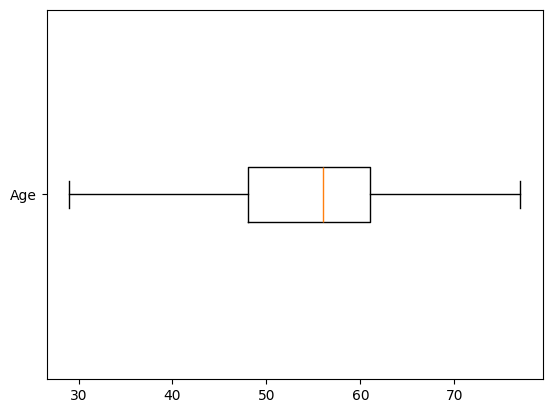

/var/folders/_b/7k_xhq8s36qdft_gbspxy7mm0000gp/T/ipykernel_63603/2454119245.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, vert=False, labels=['Cholesterol'])


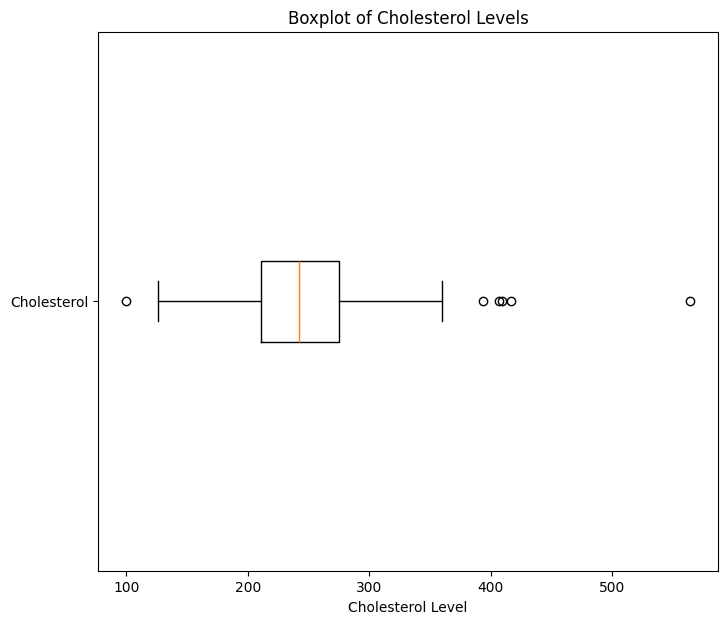

Missing values in 'chol': 0
Missing values in 'age': 0


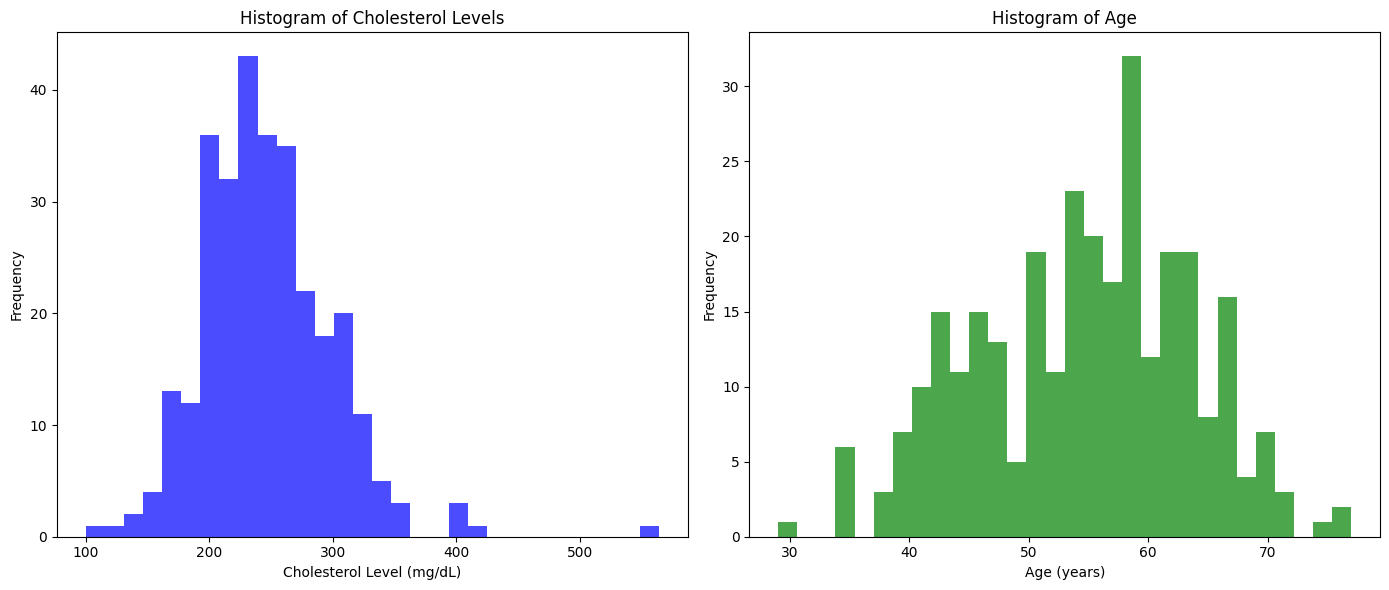

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

values=df['age']
plt.boxplot(values, vert=False , labels = ['Age'])
plt.show()

# df = df.dropna(subset=['chol'])
# df['chol'].fillna(df['chol'].mean(), inplace=True)
values = df['chol']
plt.figure(figsize=(8, 7))
plt.boxplot(values, vert=False, labels=['Cholesterol'])
plt.title('Boxplot of Cholesterol Levels')  
plt.xlabel('Cholesterol Level')  
plt.show()

print("Missing values in 'chol':", df['chol'].isnull().sum())
print("Missing values in 'age':", df['age'].isnull().sum())


df['chol'].dropna(inplace=True)  
df['age'].dropna(inplace=True)   


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)  
plt.hist(df['chol'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Cholesterol Levels')
plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  
plt.hist(df['age'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')


plt.tight_layout() 
plt.show()

By looking at the graph, we came to the conclusion in the box plot and histogram, certain values have strayed away from the measure of central tendency

These are the potential outliers which have been corrected in the fifth question below

### Qn 5

To remove outliers, we used the z-score with a threshold of 3 to remove outliers from the data

initial dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB
None


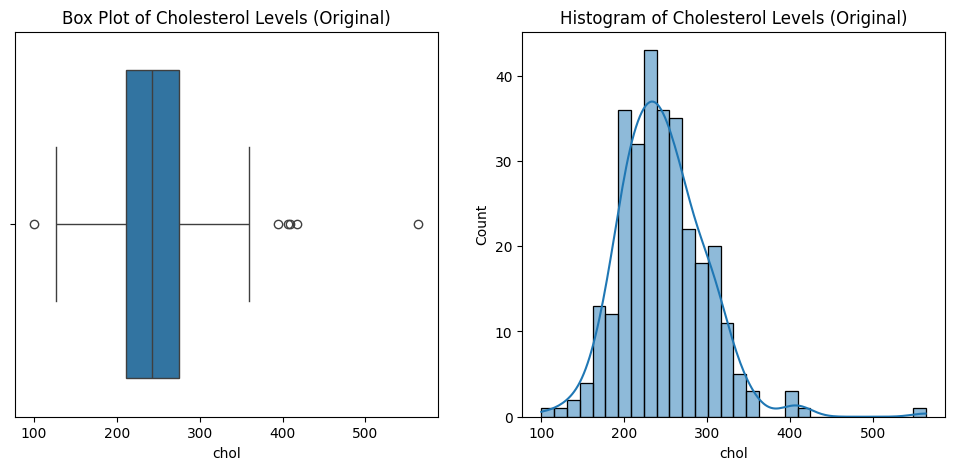


 Updated DataFrame Info after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        295 non-null    int64  
 1   age       295 non-null    int64  
 2   sex       295 non-null    object 
 3   dataset   295 non-null    object 
 4   cp        295 non-null    object 
 5   trestbps  295 non-null    float64
 6   chol      295 non-null    float64
 7   fbs       295 non-null    object 
 8   restecg   295 non-null    object 
 9   thalch    295 non-null    float64
 10  exang     295 non-null    object 
 11  oldpeak   295 non-null    float64
 12  slope     295 non-null    object 
 13  ca        295 non-null    float64
 14  thal      295 non-null    object 
 15  num       295 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.2+ KB
None


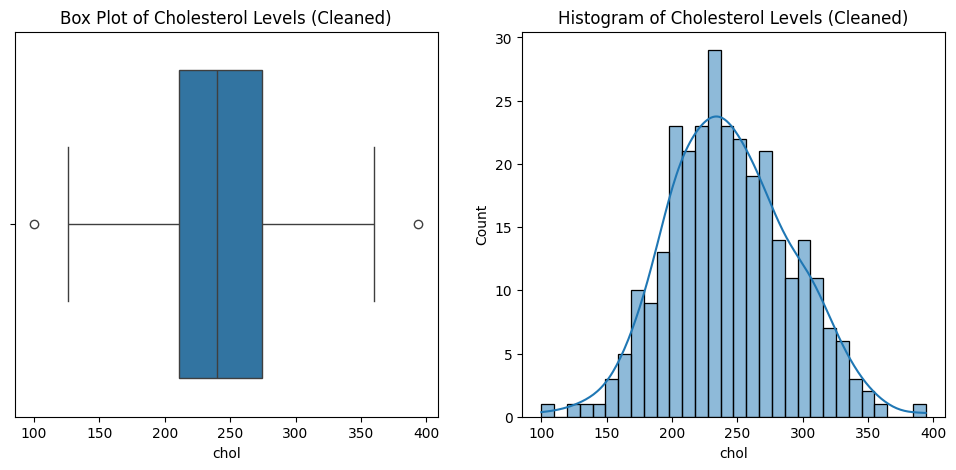

In [26]:
import seaborn as sns
import scipy.stats as stats

print("initial dataframe info:")
print(df.info())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['chol'])
plt.title('Box Plot of Cholesterol Levels (Original)')

plt.subplot(1, 2, 2)
sns.histplot(df['chol'], bins=30, kde=True)
plt.title('Histogram of Cholesterol Levels (Original)')

plt.show()

z_scores = np.abs(stats.zscore(df['chol']))

threshold = 3

df_cleaned = df[z_scores < threshold]
df = df_cleaned

print("\n Updated DataFrame Info after removing outliers:")
print(df_cleaned.info())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['chol'])
plt.title('Box Plot of Cholesterol Levels (Cleaned)')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['chol'], bins=30, kde=True)
plt.title('Histogram of Cholesterol Levels (Cleaned)')

plt.show()

### Qn 6

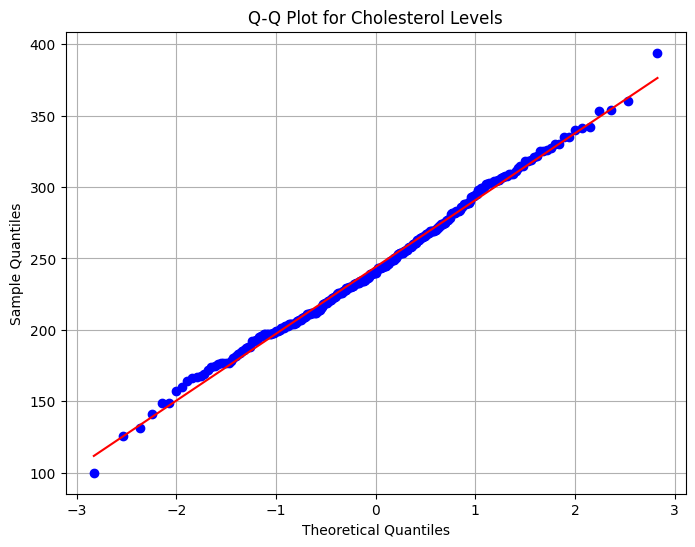

In [34]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['chol'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Cholesterol Levels')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

We conclude that the above Q-Q plot is neither left-skewed nor right-skewed.

Almost all the points on the probability plot lie toward the straight line. However, its common for a few points at either end to stray from the line 

From this, we can assume that the present data is normal

### Qn 7

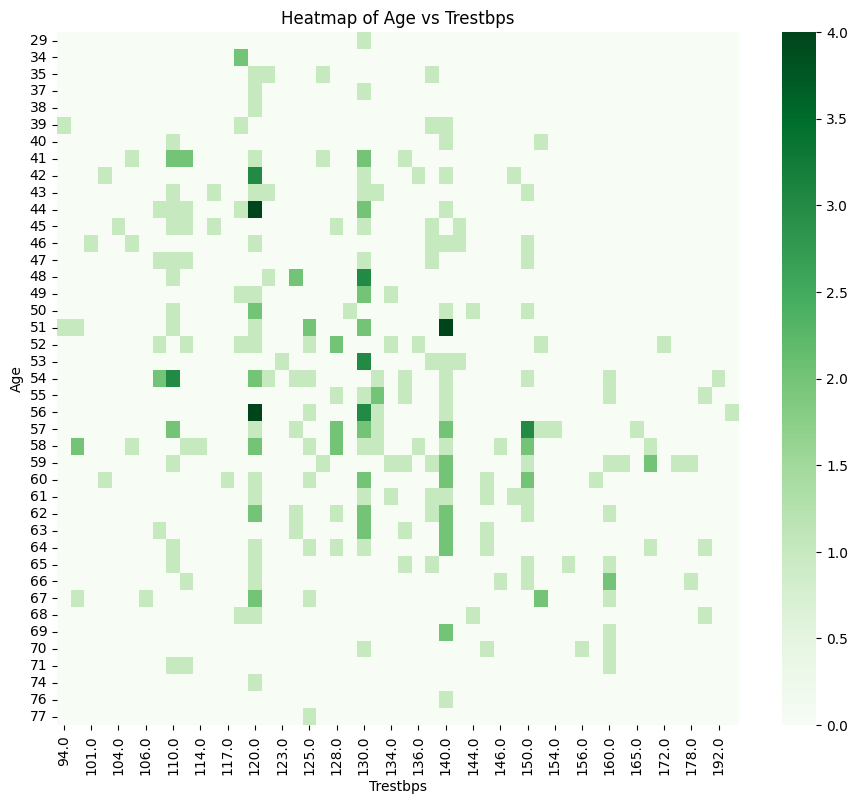

In [28]:
pivot_table = df.pivot_table(index='age', columns='trestbps', aggfunc='size', fill_value=0)

plt.figure(figsize=(11, 9))
sns.heatmap(pivot_table, cmap='Greens')
plt.title('Heatmap of Age vs Trestbps')
plt.xlabel('Trestbps')
plt.ylabel('Age')
plt.show()

### Qn 8

<Figure size 1000x1000 with 0 Axes>

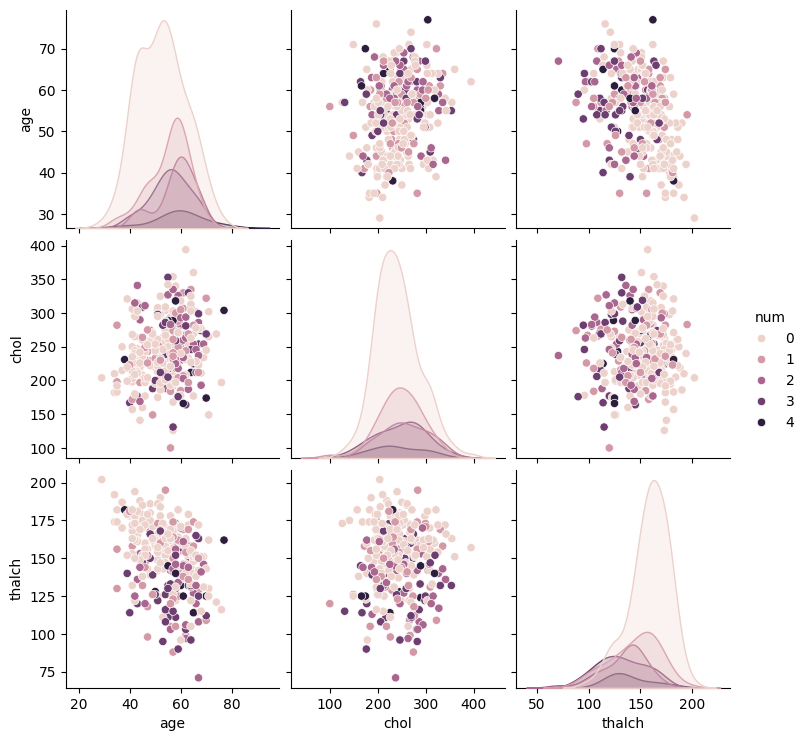

In [29]:
plot_columns = ['age', 'chol', 'thalch']


plt.figure(figsize=(10, 10))
sns.pairplot(df[plot_columns + ['num']], hue='num')
plt.show()

The above pairplot provides scatter plot for each pair of variable which allows us to visually access how each feature relates to one another

The correlations which we can derive from the above pairplots are:

1. Age vs Cholesterol:

There is a positive correlation from which we can derive that there is a higher probability that the older people have higher cholesterol levels

2. Age vs Thalch(Max heart rate):

Typically a negative correlation is observed here. As people grow older, max heart rate decreases

3. Cholesterol vs max heart rate:

This shows varying trends which is highly dependent on the heart diseases of respective individuals

# Unit 2

### Qn 9

In [30]:
np.random.seed(42)
n = 1000
cholesterol_with_disease = np.random.normal(loc=240, scale=30, size=n//2)
cholesterol_without_disease = np.random.normal(loc=220, scale=30, size=n//2)

data = pd.DataFrame({
    'cholesterol': np.concatenate([cholesterol_with_disease, cholesterol_without_disease]),
    'heart_disease': [1] *(n // 2)+[0]*(n // 2)
})


chol_with_disease = data[data['heart_disease'] == 1]['cholesterol']
chol_without_disease = data[data['heart_disease'] == 0]['cholesterol']


t_stat, p_value = stats.ttest_ind(chol_with_disease, chol_without_disease)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# conclusion for a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    print("reject the null hypothesis; there is a significant difference in cholesterol levels")
else:
    print("fail to reject the null hypothesis; there is no significant difference in cholesterol levels")
    

T-statistic: 10.356832792471206
P-value: 6.045297535584668e-24
reject the null hypothesis; there is a significant difference in cholesterol levels


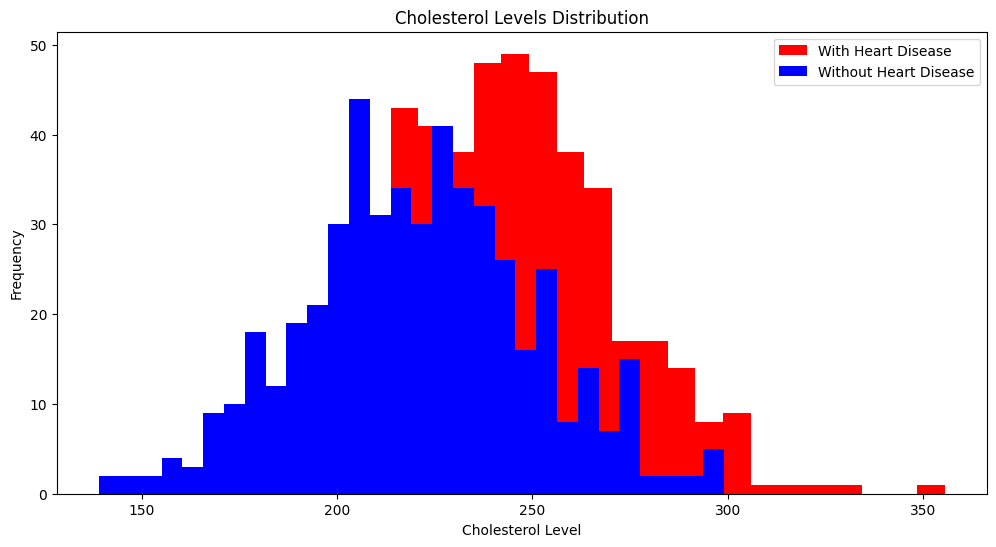

In [31]:
# plotting histograms for both groups
plt.figure(figsize=(12, 6))
plt.hist(chol_with_disease, bins=30, label='With Heart Disease', color='red')
plt.hist(chol_without_disease, bins=30, label='Without Heart Disease', color='blue')
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Qn 10

In [32]:
from scipy.stats import norm

def calculate_margin_of_error(confidence_level, standard_deviation, sample_size):
    # determining z-score for the confidence level
    z_score = norm.ppf((1 + confidence_level) / 2)
    
    # calculating moe
    margin_of_error = z_score * (standard_deviation / np.sqrt(sample_size))
    
    return margin_of_error

confidence_level = 0.95
standard_deviation = 30
sample_size = 1000

moe = calculate_margin_of_error(confidence_level, standard_deviation, sample_size)
print(f"margin of error: {moe:.2f}")


margin of error: 1.86


We are confident about the true mean cholesterol level of the population falls within the confidence level 0.95

Usually, margin of error is influenced by the sample size. Larger sample sizes tend to yield smaller margin errors

From the above results, we have concluded that with a margin of error of 1.86, we can expect true population to fall within 1.86 units

# Unit 3

### Qn 11

Linear Regression: Age vs. Cholesterol:
Intercept: 196.9419
Slope: 0.8656
R-squared: 0.0281
RMSE: 45.8675
MSE: 2103.8242



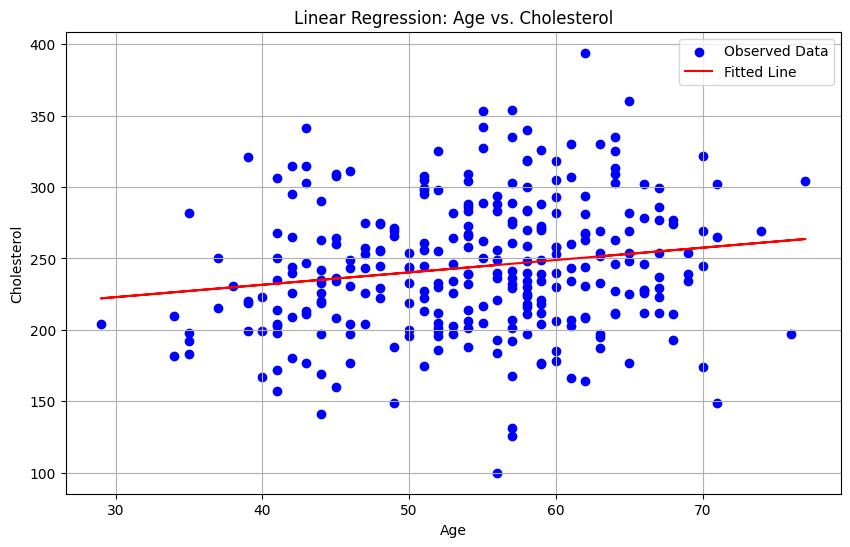

Linear Regression: Resting Blood Pressure (trestbps) vs. Cholesterol:
Intercept: 190.5439
Slope: 0.4063
R-squared: 0.0241
RMSE: 45.9624
MSE: 2112.5403



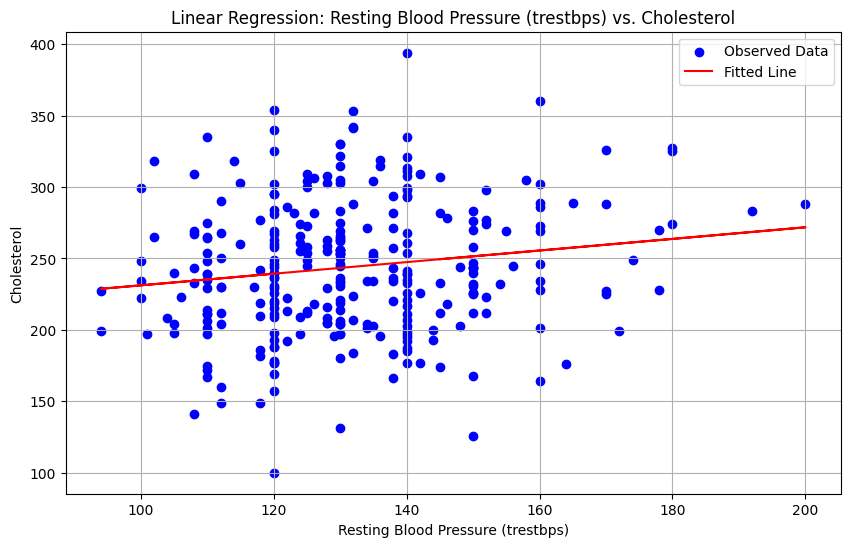

Linear Regression: Maximum Heart Rate (thalch) vs. Cholesterol:
Intercept: 244.2498
Slope: -0.0014
R-squared: 0.0000
RMSE: 46.5261
MSE: 2164.6753



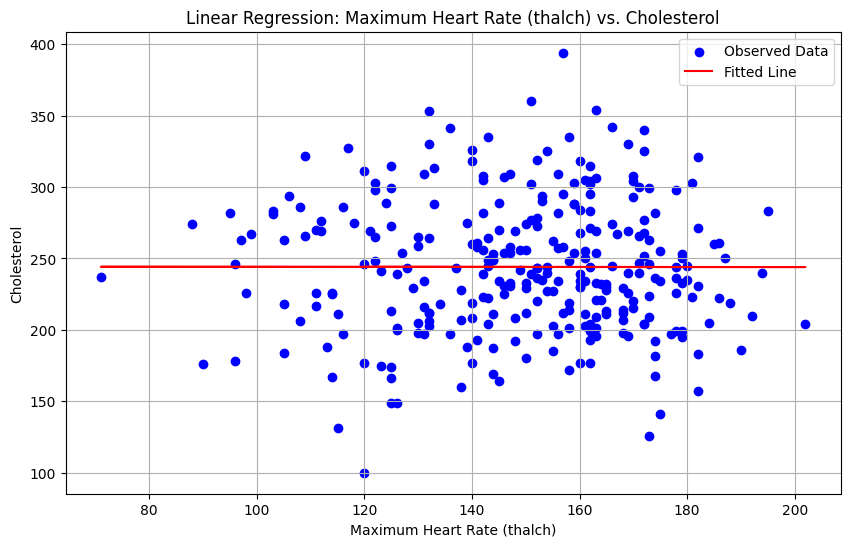

Linear Regression: ST Depression (oldpeak) vs. Cholesterol:
Intercept: 244.3820
Slope: -0.3267
R-squared: 0.0001
RMSE: 46.5246
MSE: 2164.5341



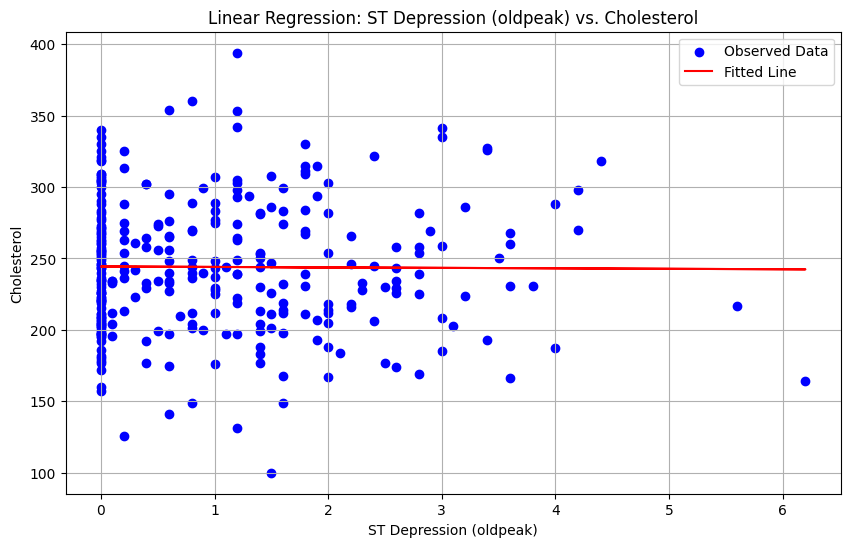

Linear Regression: Number of Major Vessels (ca) vs. Cholesterol:
Intercept: 240.5312
Slope: 5.3092
R-squared: 0.0112
RMSE: 46.2644
MSE: 2140.3969



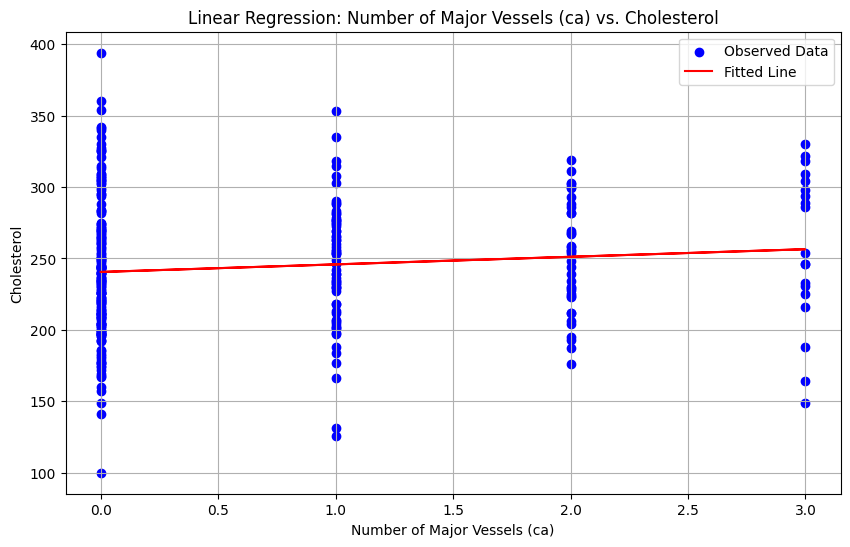

Linear Regression: Heart Disease Diagnosis (num) vs. Cholesterol:
Intercept: 241.7970
Slope: 2.3894
R-squared: 0.0039
RMSE: 46.4347
MSE: 2156.1818



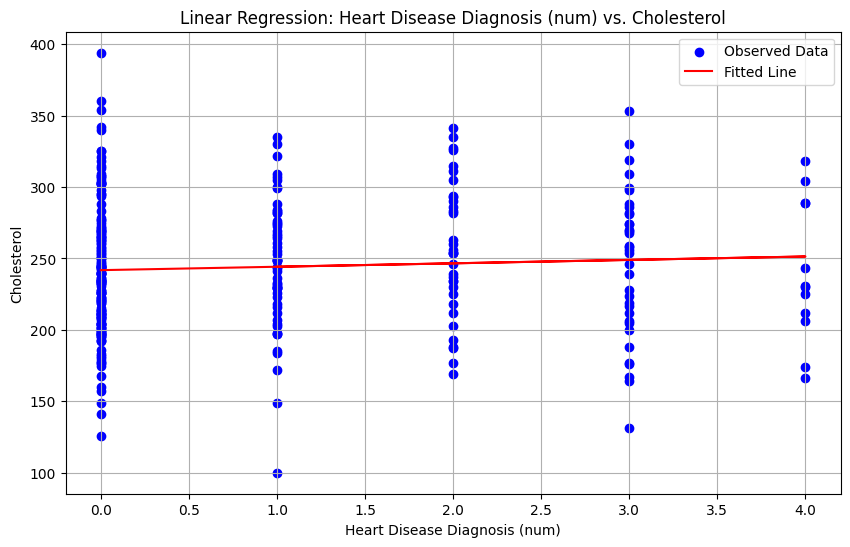

In [33]:
from math import sqrt

cols = ['age', 'chol', 'trestbps', 'thalch', 'oldpeak', 'ca', 'num']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=cols)

def plot_regression(x, y, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_error = stats.linregress(x, y)
    predicted_y = intercept + slope * x
    mse = np.mean((y - predicted_y) ** 2)
    rmse = sqrt(mse)
    
    print(f"{title}:")
    print(f"Intercept: {intercept:.4f}")
    print(f"Slope: {slope:.4f}")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}\n")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Observed Data')
    plt.plot(x, predicted_y, color='red', label='Fitted Line')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

independent_vars = [
    ('age', 'Age'),
    ('trestbps', 'Resting Blood Pressure (trestbps)'),
    ('thalch', 'Maximum Heart Rate (thalch)'),
    ('oldpeak', 'ST Depression (oldpeak)'),
    ('ca', 'Number of Major Vessels (ca)'),
    ('num', 'Heart Disease Diagnosis (num)')
]

for var, label in independent_vars:
    plot_regression(df[var], df['chol'], label, 'Cholesterol', f'Linear Regression: {label} vs. Cholesterol')


### Qn 12

Some of the features for improving the  predictive power of a model for assessing hear disease is:

-> we can include the body mass index variable because it is measure of the body fat and higher BMI is greater obesity which is is a risk factor for heart disease.

->we can also include the Age- group variable to the file because heart disease risk will increases with the age .

-> we can add cholesterol variable for this because this is an ratio for determining the heart disease risk as when cholesterol ratio increases the heart attack might happen.